**torch**

this is main pytorch library, a deep learning framework, used for building and training neural networks
**torch.nn**



In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as  transforms

In [3]:
transform = transforms.Compose([
                      transforms.Grayscale(num_output_channels=1),
                      transforms.Resize((28,28)),
                      transforms.ToTensor(),
                      transforms.Normalize((0.5,),(0.5,))
                      ])

In [4]:
trainset = torchvision.datasets.MNIST(root="/data",train=True,download=True,transform=transform)

testset = torchvision.datasets.MNIST(root="/data",train=False,download=True,transform=transform)

trainloader = DataLoader(trainset ,batch_size=64,shuffle=True)

testloader = DataLoader(testset ,batch_size=64,shuffle=False)



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 15.6MB/s]


Extracting /data/MNIST/raw/train-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]


Extracting /data/MNIST/raw/train-labels-idx1-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.41MB/s]


Extracting /data/MNIST/raw/t10k-images-idx3-ubyte.gz to /data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.18MB/s]

Extracting /data/MNIST/raw/t10k-labels-idx1-ubyte.gz to /data/MNIST/raw



In [5]:
class MLP(nn.Module):
  def __init__(self):
    super(MLP,self).__init__()
    self.fc1 = nn.Linear(28*28,128)
    self.fc2 = nn.Linear(128,10)
    self.relu=nn.ReLU()

  def forward(self,x):
    x = x.view(-1,28*28)
    x = self.relu(self.fc1(x))
    x = self.fc2(x)
    return x

In [6]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer =optim.Adam(model.parameters(),lr=0.001)

In [7]:
epochs = 5
for epoch in range(epochs):
  model.train()
  running_loss = 0.0
  correct =0
  total =0
  for inputs, labels in trainloader:
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs ,labels )
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    _,predicted = torch.max(outputs,1)
    total +=labels.size(0)
    correct +=(predicted ==labels).sum().item()

  print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader)} , Accuracy: {100*correct/total}")

Epoch 1/5, Loss: 0.3917079259401191 , Accuracy: 88.63
Epoch 2/5, Loss: 0.20451423267263974 , Accuracy: 93.89833333333333
Epoch 3/5, Loss: 0.14602889248164003 , Accuracy: 95.68833333333333
Epoch 4/5, Loss: 0.11942403920805023 , Accuracy: 96.38
Epoch 5/5, Loss: 0.1010443911121201 , Accuracy: 96.91


In [12]:
#  Evaluate on Test Data
model.eval()
correct =0
total =0
act_labels =torch.tensor([])
model_predicted =torch.tensor([])

with torch.no_grad():
  for inputs, labels in testloader:
    outputs =model(inputs)
    act_labels = torch.cat((act_labels ,labels ) ,dim =0)
    _, predicted = torch.max(outputs,1)
    model_predicted = torch.cat((model_predicted ,predicted),dim=0 )
    total +=labels.size(0)
    correct += (predicted ==labels).sum().item()
print(f"Test Accuracy: {100*correct/total:.2f}")

Test Accuracy: 96.84


In [13]:
print(model_predicted)
print(act_labels)

tensor([7., 2., 1.,  ..., 4., 5., 6.])
tensor([7., 2., 1.,  ..., 4., 5., 6.])


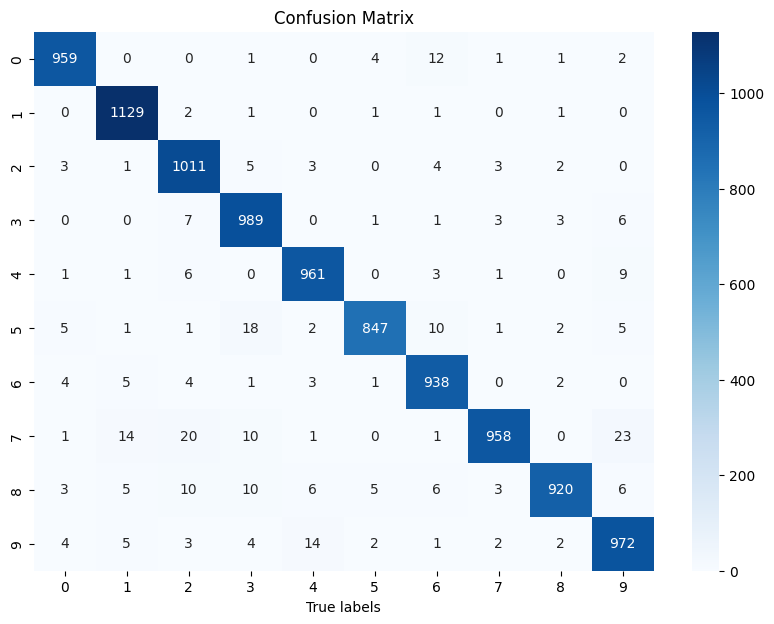

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

cm = confusion_matrix(act_labels ,model_predicted )

plt.figure(figsize =(10,7))
sns.heatmap(cm,annot=True ,fmt ='g' ,cmap ="Blues" ,xticklabels=np.arange(10) ,yticklabels=np.arange(10))

plt.title("Confusion Matrix")
plt.xlabel("Predicted, labels")
plt.xlabel("True labels")
plt.show()


In [9]:
from PIL import Image
def test_single_img(img_path ,model):
  img = Image.open(img_path)
  img  = transform(img).unsqueeze(0)
  model.eval()

  with torch.no_grad():
    outputs = model(img)
    _,predicted = torch.max(outputs,1)
  return predicted.item()


In [ ]:
import matplotlib.pyplot as plt


img_path = "/content/4.png"

predicted_class = test_single_img(img_path,model)

img = Image.open(img_path)
plt.imshow(img, cmap ="gray")
plt.title(f"Predicted class: {predicted_class}")
plt.show()